# 🌳 Random Forest 🌳

Un Random Forest (Bosque Aleatorio) es un conjunto de árboles de decisión que se combinan para mejorar la precisión y la generalización del modelo. La idea principal detrás de un Random Forest es construir múltiples árboles de decisión durante el proceso de entrenamiento y combinar sus predicciones para obtener un resultado más robusto y preciso.

A continuación, se describen los elementos clave de un Random Forest:

1. **Muestreo Bootstrap (Bootstrapped Sampling):** Para construir cada árbol en el bosque, se toma una muestra de entrenamiento del conjunto de datos original utilizando muestreo con reemplazo (bootstrap). Esto significa que algunas instancias pueden aparecer varias veces en la muestra, mientras que otras pueden no aparecer en absoluto. Este proceso de muestreo aleatorio se realiza para cada árbol del bosque.

2. **Selección Aleatoria de Características:** Durante la construcción de cada nodo en un árbol, se selecciona solo un subconjunto aleatorio de características para considerar al tomar decisiones. Esta técnica se conoce como "muestreo de características" y ayuda a que los árboles sean más independientes entre sí.

3. **Construcción de Árboles Independientes:** Cada árbol en el Random Forest se construye de forma independiente, utilizando el muestreo bootstrap y la selección aleatoria de características. Como resultado, los árboles son diversos y capturan diferentes aspectos del conjunto de datos.

4. **Votación o Promedio de Predicciones:** Para hacer una predicción con el Random Forest, cada árbol en el bosque emite su propia predicción y luego se realiza una votación (en el caso de clasificación) o se calcula el promedio (en el caso de regresión) para determinar la predicción final del bosque.

Los Random Forests son conocidos por su capacidad para manejar sobreajuste (overfitting) y generalizar bien a nuevos datos. También son robustos ante datos ruidosos y variables irrelevantes. Estos modelos son ampliamente utilizados en la práctica y son una extensión efectiva de los árboles de decisión individuales. La biblioteca scikit-learn en Python proporciona una implementación eficiente y fácil de usar de Random Forests.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Cargar el conjunto de datos Iris como ejemplo
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Crear un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [7]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 100.00%


In [8]:
# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [9]:
# Puedes visualizar la importancia de las características en el modelo
feature_importances = rf_model.feature_importances_
print("Importancia de las características:", feature_importances)

Importancia de las características: [0.10809762 0.03038681 0.43999397 0.42152159]


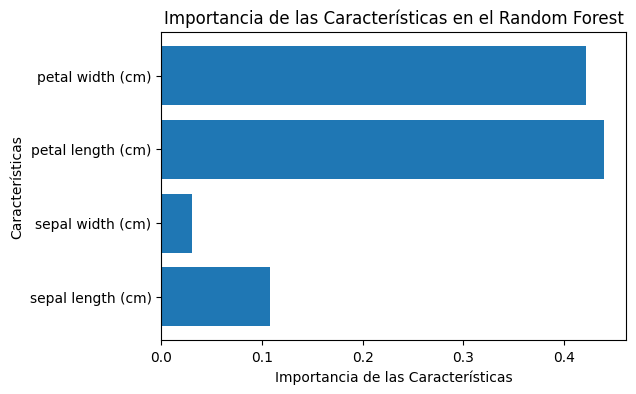

In [11]:
# Puedes también visualizar la importancia de las características
plt.figure(figsize=(6, 4))
plt.barh(range(X.shape[1]), feature_importances, align="center")
plt.yticks(range(X.shape[1]), iris.feature_names)
plt.xlabel("Importancia de las Características")
plt.ylabel("Características")
plt.title("Importancia de las Características en el Random Forest")
plt.show()